In [2]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors, Lipinski
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import PandasTools

In [5]:
input_file = 'C:/Users/asus/sider.csv'
output_file = 'C:/Users/asus/sider_modified.csv'
cols_to_remove = [3, 5, 8]
cols_to_remove = sorted(cols_to_remove, reverse=True)
row_count = 0

with open(input_file, 'r') as source:
    reader = csv.reader(source)
    with open(output_file, 'w', newline='') as result:
        writer = csv.writer(result)
        for row in reader:
            row_count += 1
            print('\r{0}'.format(row_count), end='')
            for col_index in cols_to_remove:
                del row[col_index]
            writer.writerow(row)

1428

In [6]:
df = pd.read_csv('sider_modified.csv')
sd = pd.read_csv('offside_socs_modified.csv')
df
sd

,smiles,Hepatobiliary disorders,Metabolism and nutrition disorders,Eye disorders,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Immune system disorders,Reproductive system and breast disorders,"Neoplasms benign, malignant and unspecified (incl cysts and polyps)",General disorders and administration site conditions,...,"Congenital, familial and genetic disorders",Infections and infestations,"Respiratory, thoracic and mediastinal disorders",Psychiatric disorders,Renal and urinary disorders,"Pregnancy, puerperium and perinatal conditions",Ear and labyrinth disorders,Cardiac disorders,Nervous system disorders,"Injury, poisoning and procedural complications"
0,CC12CCC3C(C1CCC2=O)CC=C4C3(CCC(C4)O)C,1,1,0,1,1,1,1,1,1,...,0,1,1,1,1,0,1,1,1,1
1,C[N+](C)(C)CC(CC(=O)O)O,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
2,C(CC(=O)O)CN,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,C1C(N(C2=C(N1)NC(=NC2=O)N)C=O)CNC3=CC=C(C=C3)C...,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,CCCCCC(C=CC1C(CC(=O)C1CC=CCCCC(=O)O)O)O,1,0,0,1,1,1,0,0,1,...,1,1,0,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=C(C=C3)C#C...,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1328,C1CC(N(C1)C(=O)C2CSSCC(C(=O)NC(C(=O)NC(C(=O)NC...,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
1329,CCC1C(=O)N2CCCC2C(=O)N(C(C(=O)N3CCC(=O)CC3C(=O...,1,1,0,1,1,0,0,1,1,...,0,1,1,0,0,0,0,1,0,0
1330,CC1=C(C(=CC=C1)C)OCC(=O)NC(CC2=CC=CC=C2)C(CC(C...,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [7]:
ad = pd.read_csv('sider_modified.csv')
ad

,smiles,Hepatobiliary disorders,Metabolism and nutrition disorders,Eye disorders,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Immune system disorders,Reproductive system and breast disorders,"Neoplasms benign, malignant and unspecified (incl cysts and polyps)",General disorders and administration site conditions,...,"Congenital, familial and genetic disorders",Infections and infestations,"Respiratory, thoracic and mediastinal disorders",Psychiatric disorders,Renal and urinary disorders,"Pregnancy, puerperium and perinatal conditions",Ear and labyrinth disorders,Cardiac disorders,Nervous system disorders,"Injury, poisoning and procedural complications"
0,C(CNCCNCCNCCN)N,1,1,0,1,1,0,0,0,1,...,0,0,1,1,0,0,1,1,1,0
1,CC(C)(C)C1=CC(=C(C=C1NC(=O)C2=CNC3=CC=CC=C3C2=...,0,1,0,1,1,0,1,0,0,...,0,1,1,0,0,0,1,0,1,0
2,CC[C@]12CC(=C)[C@H]3[C@H]([C@@H]1CC[C@]2(C#C)O...,0,1,1,0,1,1,1,1,0,...,0,0,0,1,0,0,0,0,1,0
3,CCC12CC(=C)C3C(C1CC[C@]2(C#C)O)CCC4=CC(=O)CCC34,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,1,1
4,C1C(C2=CC=CC=C2N(C3=CC=CC=C31)C(=O)N)O,1,1,1,1,1,1,0,0,1,...,0,1,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,C[C@H]1CN(CC[C@@]1(C)C2=CC(=CC=C2)O)C[C@H](CC3...,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1423,CC[C@@H]1[C@@]2([C@@H]([C@@H](C(=O)[C@@H](C[C@...,1,1,1,1,1,1,1,0,1,...,0,1,1,1,1,0,1,1,1,1
1424,CCOC1=CC=C(C=C1)CC2=C(C=CC(=C2)[C@H]3[C@@H]([C...,1,1,0,1,1,1,1,1,1,...,0,1,0,0,1,0,0,1,1,1
1425,C1CN(CCC1N2C3=CC=CC=C3NC2=O)CCCC(C4=CC=C(C=C4)...,0,1,1,1,1,0,1,0,1,...,0,0,0,1,1,0,0,1,1,1


In [8]:
l = [ad, sd]
sider_offsides = pd.concat(l)

In [9]:
sider_offsides.shape

(2759, 25)

In [10]:
od = pd.read_csv('offsides_socs.csv')
od

,stitch_id,drug,umls_id,event,rr,log2rr,t_statistic,pvalue,observed,expected,bg_correction,sider,future_aers,medeffect,SOC
0,CID000000076,dehydroepiandrosterone,C0000737,abdominal pain,2.250000,1.169925,6.537095,6.156712e-07,9,4.000000,0.002849,0,0,0,Gastrointestinal disorders
1,CID000000076,dehydroepiandrosterone,C0001622,hyperadrenalism,11.000000,3.459432,4.782699,1.644408e-03,2,0.181818,0.000041,0,0,0,Endocrine disorders
2,CID000000076,dehydroepiandrosterone,C0001623,adrenal insufficiency,2.200000,1.137504,4.315199,9.884952e-03,2,0.909091,0.002491,0,0,0,Endocrine disorders
3,CID000000076,dehydroepiandrosterone,C0002792,anaphylactic reaction,2.588235,1.371969,4.590918,3.355380e-03,4,1.545455,0.000503,0,0,0,Immune system disorders
4,CID000000076,dehydroepiandrosterone,C0002940,aneurysm,7.333333,2.874469,4.598374,3.399457e-03,2,0.272727,0.000135,0,0,0,Vascular disorders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438796,CID011980859,bleomycin sulfate,C1869066,hypovolaemic shock,5.076923,2.343954,6.976299,1.337393e-07,6,1.181818,0.000338,0,0,0,Hypovolaemic shock conditions (SMQ)
438797,CID011980859,bleomycin sulfate,C2242529,stem cell transplant,4.400000,2.137504,11.800431,3.370766e-18,16,3.636364,0.001934,0,0,0,Surgical and medical procedures
438798,CID011980859,bleomycin sulfate,C2363744,epstein-barr virus associated lymphoproliferat...,3.000000,1.584963,4.665783,3.752785e-03,3,1.000000,0.000629,0,0,0,"Neoplasms benign, malignant and unspecified (i..."
438799,CID011980859,bleomycin sulfate,C2363799,oxygen saturation abnormal,7.333333,2.874469,5.551510,9.547621e-05,2,0.272727,0.000037,0,0,0,Investigations


In [11]:
od.head()

,stitch_id,drug,umls_id,event,rr,log2rr,t_statistic,pvalue,observed,expected,bg_correction,sider,future_aers,medeffect,SOC
0,CID000000076,dehydroepiandrosterone,C0000737,abdominal pain,2.250000,1.169925,6.537095,6.156712e-07,9,4.000000,0.002849,0,0,0,Gastrointestinal disorders
1,CID000000076,dehydroepiandrosterone,C0001622,hyperadrenalism,11.000000,3.459432,4.782699,1.644408e-03,2,0.181818,0.000041,0,0,0,Endocrine disorders
2,CID000000076,dehydroepiandrosterone,C0001623,adrenal insufficiency,2.200000,1.137504,4.315199,9.884952e-03,2,0.909091,0.002491,0,0,0,Endocrine disorders
3,CID000000076,dehydroepiandrosterone,C0002792,anaphylactic reaction,2.588235,1.371969,4.590918,3.355380e-03,4,1.545455,0.000503,0,0,0,Immune system disorders
4,CID000000076,dehydroepiandrosterone,C0002940,aneurysm,7.333333,2.874469,4.598374,3.399457e-03,2,0.272727,0.000135,0,0,0,Vascular disorders


In [12]:
list(set(sider_offsides.smiles))

['CC(C)(C(=O)O)OC1=CC=C(C=C1)C2CC2(Cl)Cl',
 'C1=CC=NC(=C1)C(=O)[O-].C1=CC=NC(=C1)C(=O)[O-].C1=CC=NC(=C1)C(=O)[O-].[Cr+3]',
 'C1C2CC3CC(CC1N3CC2=O)OC(=O)C4=CNC5=CC=CC=C54',
 'CC(=CCCC(=CCCC(=CCCC(=CCO)C)CO)C)C',
 'CC(CN1C2=CC=CC=C2SC3=CC=CC=C31)CN(C)C.CC(=O)C(C(C(=O)C)O)O',
 'C1CC(N(C1)C(=O)C(CCCCN)NC(CCC2=CC=CC=C2)C(=O)O)C(=O)O',
 'CCCCC(C)CC(C=CC1C(CC(=O)C1CCCCC=CC(=O)O)O)O.C(C1C2C(C(C(O1)OC3C(OC(C(C3O)O)OC4C(OC(C(C4O)O)OC5C(OC(C(C5O)O)OC6C(OC(C(C6O)O)OC7C(OC(O2)C(C7O)O)CO)CO)CO)CO)CO)O)O)O',
 'CN1C2CC(CC1C3C2O3)OC(=O)C(CO)C4=CC=CC=C4',
 'C1=CN(C(=O)NC1=O)[C@H]2[C@@H]([C@@H]([C@H](O2)COP(=O)(O)O[C@@H]3[C@H](O[C@H]([C@@H]3O)N4C=CC(=O)NC4=O)CO)O)O',
 'C=CCN1CCC23C4C(=O)CCC2(C1CC5=C3C(=C(C=C5)O)O4)O',
 'CC1=C(C=C(C=C1)N2C(=O)C(=C(N2)C)N/N=C/3\\C=CC=C(C3=O)C4=CC(=CC=C4)C(=O)O)C',
 'C(C(C(C(C(C(=O)O)O)O)O)O)O',
 'CC12CC(C3C(C1CCC2(C(=O)CO)O)CCC4=CC(=O)C=CC34C)O',
 'C[C@@H](C(=O)N[C@@H](CCC(=O)O)C(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](CCC(=O)O)C(=O)N[C@@H](CO)C(=O)N[C@@H](C)C(=O)N[C@@H](CCC(=O)O)

In [13]:
list(sider_offsides['smiles'].unique())

['C(CNCCNCCNCCN)N',
 'CC(C)(C)C1=CC(=C(C=C1NC(=O)C2=CNC3=CC=CC=C3C2=O)O)C(C)(C)C',
 'CC[C@]12CC(=C)[C@H]3[C@H]([C@@H]1CC[C@]2(C#C)O)CCC4=CCCC[C@H]34',
 'CCC12CC(=C)C3C(C1CC[C@]2(C#C)O)CCC4=CC(=O)CCC34',
 'C1C(C2=CC=CC=C2N(C3=CC=CC=C31)C(=O)N)O',
 'CC[C@H](C)[C@H]1C(=O)N[C@H]2CSSC[C@@H](C(=O)N[C@@H](CSSC[C@@H](C(=O)NCC(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@@H](CSSC[C@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=O)[C@@H](NC(=O)[C@@H](NC2=O)CO)CC(C)C)CC3=CC=C(C=C3)O)CCC(=O)N)CC(C)C)CCC(=O)O)CC(=O)N)CC4=CC=C(C=C4)O)C(=O)NCC(=O)O)C(=O)NCC(=O)N[C@@H](CCC(=O)O)C(=O)N[C@@H](CCCNC(=N)N)C(=O)NCC(=O)N[C@@H](CC5=CC=CC=C5)C(=O)N[C@@H](CC6=CC=CC=C6)C(=O)N[C@@H](CC7=CC=C(C=C7)O)C(=O)N[C@@H]([C@@H](C)O)C(=O)N8CCC[C@H]8C(=O)N[C@@H](CCCCN)C(=O)N[C@@H]([C@@H](C)O)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](CCCNC(=N)N)C(=O)O)C(C)C)CC(C)C)CC9=CC=C(C=C9)O)CC(C)C)C)CCC(=O)O)C(C)C)CC(C)C)C

In [14]:
a = len(pd.unique(sider_offsides['smiles']))
a

2043

,smiles,Hepatobiliary disorders,Metabolism and nutrition disorders,Eye disorders,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Immune system disorders,Reproductive system and breast disorders,"Neoplasms benign, malignant and unspecified (incl cysts and polyps)",General disorders and administration site conditions,...,Infections and infestations,"Respiratory, thoracic and mediastinal disorders",Psychiatric disorders,Renal and urinary disorders,"Pregnancy, puerperium and perinatal conditions",Ear and labyrinth disorders,Cardiac disorders,Nervous system disorders,"Injury, poisoning and procedural complications",Molecule
0,C(CNCCNCCNCCN)N,1,1,0,1,1,0,0,0,1,...,0,1,1,0,0,1,1,1,0,
1,CC(C)(C)C1=CC(=C(C=C1NC(=O)C2=CNC3=CC=CC=C3C2=...,0,1,0,1,1,0,1,0,0,...,1,1,0,0,0,1,0,1,0,
2,CC[C@]12CC(=C)[C@H]3[C@H]([C@@H]1CC[C@]2(C#C)O...,0,1,1,0,1,1,1,1,0,...,0,0,1,0,0,0,0,1,0,
3,CCC12CC(=C)C3C(C1CC[C@]2(C#C)O)CCC4=CC(=O)CCC34,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,1,1,
4,C1C(C2=CC=CC=C2N(C3=CC=CC=C31)C(=O)N)O,1,1,1,1,1,1,0,0,1,...,1,1,1,0,0,1,0,1,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=C(C=C3)C#C...,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,
1328,C1CC(N(C1)C(=O)C2CSSCC(C(=O)NC(C(=O)NC(C(=O)NC...,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,
1329,CCC1C(=O)N2CCCC2C(=O)N(C(C(=O)N3CCC(=O)CC3C(=O...,1,1,0,1,1,0,0,1,1,...,1,1,0,0,0,0,1,0,0,
1330,CC1=C(C(=CC=C1)C)OCC(=O)NC(CC2=CC=CC=C2)C(CC(C...,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,

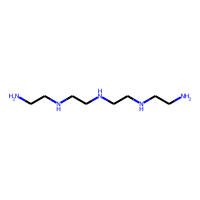
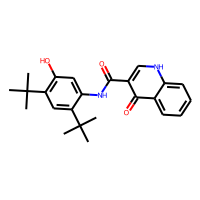
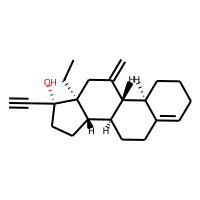
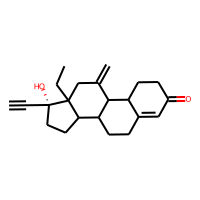
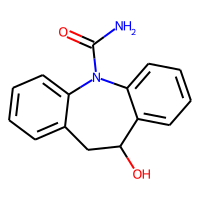
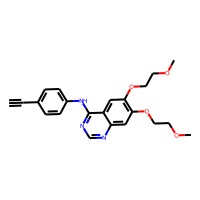
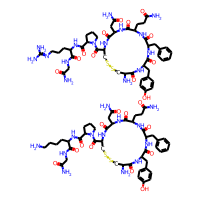
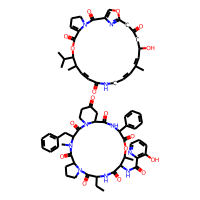
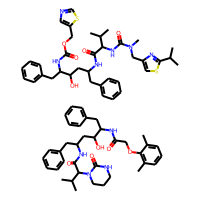
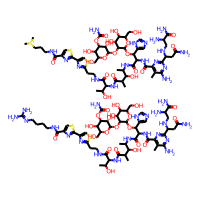

In [24]:
#b = sider_offsides.nunique(axis=0)
#print('\n',b)
sider_offsides

In [18]:
PandasTools.AddMoleculeColumnToFrame(sider_offsides,'smiles','Molecule')


,smiles,Hepatobiliary disorders,Metabolism and nutrition disorders,Eye disorders,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Immune system disorders,Reproductive system and breast disorders,"Neoplasms benign, malignant and unspecified (incl cysts and polyps)",General disorders and administration site conditions,...,Infections and infestations,"Respiratory, thoracic and mediastinal disorders",Psychiatric disorders,Renal and urinary disorders,"Pregnancy, puerperium and perinatal conditions",Ear and labyrinth disorders,Cardiac disorders,Nervous system disorders,"Injury, poisoning and procedural complications",Molecule
0,C(CNCCNCCNCCN)N,1,1,0,1,1,0,0,0,1,...,0,1,1,0,0,1,1,1,0,
1,CC(C)(C)C1=CC(=C(C=C1NC(=O)C2=CNC3=CC=CC=C3C2=...,0,1,0,1,1,0,1,0,0,...,1,1,0,0,0,1,0,1,0,
2,CC[C@]12CC(=C)[C@H]3[C@H]([C@@H]1CC[C@]2(C#C)O...,0,1,1,0,1,1,1,1,0,...,0,0,1,0,0,0,0,1,0,
3,CCC12CC(=C)C3C(C1CC[C@]2(C#C)O)CCC4=CC(=O)CCC34,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,1,1,
4,C1C(C2=CC=CC=C2N(C3=CC=CC=C31)C(=O)N)O,1,1,1,1,1,1,0,0,1,...,1,1,1,0,0,1,0,1,0,

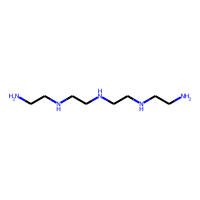
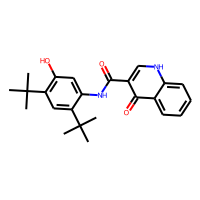
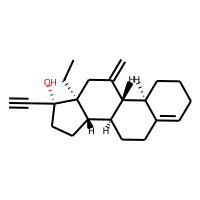
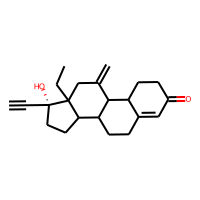
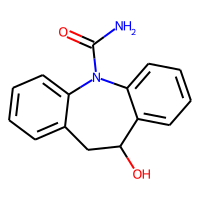

In [21]:
sider_offsides.head(5)

In [32]:
def cal_descriptors(sider_offsides, write=True):
    df_mols_desc = sider_offsides.copy()
    
    df_mols_desc['molweight'] = df_mols_desc['new_smiles'].apply(Descriptors.ExactMolWt)
    df_mols_desc['hatommolwt'] = df_mols_desc['new_smiles'].apply(Descriptors.HeavyAtomMolWt)
    df_mols_desc['maxabspartcharge'] = df_mols_desc['new_smiles'].apply(Descriptors.MaxAbsPartialCharge)
    df_mols_desc['maxpartcharge'] = df_mols_desc['new_smiles'].apply(Descriptors.MaxPartialCharge)
    df_mols_desc['minabspc'] = df_mols_desc['new_smiles'].apply(Descriptors.MinAbsPartialCharge)
    df_mols_desc['minpartcharge'] = df_mols_desc['new_smiles'].apply(Descriptors.MinPartialCharge)
    df_mols_desc['molwt'] = df_mols_desc['new_smiles'].apply(Descriptors.MolWt)
    df_mols_desc['numrade'] = df_mols_desc['new_smiles'].apply(Descriptors.NumRadicalElectrons)
    df_mols_desc['numval'] = df_mols_desc['new_smiles'].apply(Descriptors.NumValenceElectrons)
    
    
    # Adding Lipinski
    df_mols_desc['fracsp33'] = df_mols_desc['new_smiles'].apply(Lipinski.FractionCSP3)
    df_mols_desc['heavyatomcount'] = df_mols_desc['new_smiles'].apply(Lipinski.HeavyAtomCount)
    df_mols_desc['nhohcount'] = df_mols_desc['new_smiles'].apply(Lipinski.NHOHCount)
    df_mols_desc['nocount'] = df_mols_desc['new_smiles'].apply(Lipinski.NOCount)
    df_mols_desc['aliphcarbocycles'] = df_mols_desc['new_smiles'].apply(Lipinski.NumAliphaticCarbocycles)
    df_mols_desc['aliphhetcycles'] = df_mols_desc['new_smiles'].apply(Lipinski.NumAliphaticHeterocycles)
    df_mols_desc['aliphrings'] = df_mols_desc['new_smiles'].apply(Lipinski.NumAliphaticRings)
    df_mols_desc['arocarbocycles'] = df_mols_desc['new_smiles'].apply(Lipinski.NumAromaticCarbocycles)
    df_mols_desc['arohetcycles'] = df_mols_desc['new_smiles'].apply(Lipinski.NumAromaticHeterocycles)
    df_mols_desc['arorings'] = df_mols_desc['new_smiles'].apply(Lipinski.NumAromaticRings)
    df_mols_desc['numhacceptors'] = df_mols_desc['new_smiles'].apply(Lipinski.NumHAcceptors)
    df_mols_desc['numhdonors'] = df_mols_desc['new_smiles'].apply(Lipinski.NumHDonors)
    df_mols_desc['numhatoms'] = df_mols_desc['new_smiles'].apply(Lipinski.NumHeteroatoms)
    df_mols_desc['numrotbonds'] = df_mols_desc['new_smiles'].apply(Lipinski.NumRotatableBonds)
    df_mols_desc['numsatcarbcycles'] = df_mols_desc['new_smiles'].apply(Lipinski.NumSaturatedCarbocycles)
    df_mols_desc['numsathetcycles'] = df_mols_desc['new_smiles'].apply(Lipinski.NumSaturatedHeterocycles)
    df_mols_desc['numsatrings'] = df_mols_desc['new_smiles'].apply(Lipinski.NumSaturatedRings)
    df_mols_desc['ringcount'] = df_mols_desc['new_smiles'].apply(Lipinski.RingCount)
    
    return df_mols_desc

In [33]:
molecule_list = []
lipinski_list = []
for i in sider_offsides.smiles:
    m = Chem.MolFromSmiles(i)
    molecule_list.append(m)
for j in sider_offsides.smiles:
    l = Chem.MolFromSmiles(j)
    lipinski_list.append(l)
sider_offsides['new_smiles'] = molecule_list
sider_offsides['smiles_obj'] = lipinski_list

In [34]:
cal_descriptors(sider_offsides)


,smiles,Hepatobiliary disorders,Metabolism and nutrition disorders,Eye disorders,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Immune system disorders,Reproductive system and breast disorders,"Neoplasms benign, malignant and unspecified (incl cysts and polyps)",General disorders and administration site conditions,...,arohetcycles,arorings,numhacceptors,numhdonors,numhatoms,numrotbonds,numsatcarbcycles,numsathetcycles,numsatrings,ringcount
0,C(CNCCNCCNCCN)N,1,1,0,1,1,0,0,0,1,...,0,0,5,5,5,10,0,0,0,0
1,CC(C)(C)C1=CC(=C(C=C1NC(=O)C2=CNC3=CC=CC=C3C2=...,0,1,0,1,1,0,1,0,0,...,1,3,3,3,5,2,0,0,0,3
2,CC[C@]12CC(=C)[C@H]3[C@H]([C@@H]1CC[C@]2(C#C)O...,0,1,1,0,1,1,1,1,0,...,0,0,1,1,1,1,3,0,3,4
3,CCC12CC(=C)C3C(C1CC[C@]2(C#C)O)CCC4=CC(=O)CCC34,1,1,1,1,1,1,1,1,1,...,0,0,2,1,2,1,3,0,3,4
4,C1C(C2=CC=CC=C2N(C3=CC=CC=C31)C(=O)N)O,1,1,1,1,1,1,0,0,1,...,0,2,2,2,4,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=C(C=C3)C#C...,1,1,1,1,1,0,1,1,1,...,1,3,7,1,7,10,0,0,0,3
1328,C1CC(N(C1)C(=O)C2CSSCC(C(=O)NC(C(=O)NC(C(=O)NC...,1,1,1,1,1,1,1,1,1,...,0,4,32,27,56,38,0,4,4,8
1329,CCC1C(=O)N2CCCC2C(=O)N(C(C(=O)N3CCC(=O)CC3C(=O...,1,1,0,1,1,0,0,1,1,...,2,4,19,6,27,7,0,3,3,9
1330,CC1=C(C(=CC=C1)C)OCC(=O)NC(CC2=CC=CC=C2)C(CC(C...,1,1,1,1,1,1,1,1,1,...,2,7,14,8,22,32,0,1,1,8


In [38]:
sider_offsides.head()['smiles_obj']

0    <img data-content="rdkit/molecule" src="data:i...
1    <img data-content="rdkit/molecule" src="data:i...
2    <img data-content="rdkit/molecule" src="data:i...
3    <img data-content="rdkit/molecule" src="data:i...
4    <img data-content="rdkit/molecule" src="data:i...
Name: smiles_obj, dtype: object

In [39]:
sider_offsides.shape

(2759, 27)

In [40]:
sider_offsides.columns

Index(['smiles', 'Hepatobiliary disorders',
       'Metabolism and nutrition disorders', 'Eye disorders',
       'Musculoskeletal and connective tissue disorders',
       'Gastrointestinal disorders', 'Immune system disorders',
       'Reproductive system and breast disorders',
       'Neoplasms benign, malignant and unspecified (incl cysts and polyps)',
       'General disorders and administration site conditions',
       'Endocrine disorders', 'Surgical and medical procedures',
       'Vascular disorders', 'Blood and lymphatic system disorders',
       'Skin and subcutaneous tissue disorders',
       'Congenital, familial and genetic disorders',
       'Infections and infestations',
       'Respiratory, thoracic and mediastinal disorders',
       'Psychiatric disorders', 'Renal and urinary disorders',
       'Pregnancy, puerperium and perinatal conditions',
       'Ear and labyrinth disorders', 'Cardiac disorders',
       'Nervous system disorders',
       'Injury, poisoning and proc

In [41]:
sider_offsides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2759 entries, 0 to 1331
Data columns (total 27 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   smiles                                                               2759 non-null   object
 1   Hepatobiliary disorders                                              2759 non-null   int64 
 2   Metabolism and nutrition disorders                                   2759 non-null   int64 
 3   Eye disorders                                                        2759 non-null   int64 
 4   Musculoskeletal and connective tissue disorders                      2759 non-null   int64 
 5   Gastrointestinal disorders                                           2759 non-null   int64 
 6   Immune system disorders                                              2759 non-null   int64 
 7   Reproductive sy

In [42]:
sider_offsides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2759 entries, 0 to 1331
Data columns (total 27 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   smiles                                                               2759 non-null   object
 1   Hepatobiliary disorders                                              2759 non-null   int64 
 2   Metabolism and nutrition disorders                                   2759 non-null   int64 
 3   Eye disorders                                                        2759 non-null   int64 
 4   Musculoskeletal and connective tissue disorders                      2759 non-null   int64 
 5   Gastrointestinal disorders                                           2759 non-null   int64 
 6   Immune system disorders                                              2759 non-null   int64 
 7   Reproductive sy

In [26]:
sider_offsides['fracsp33']

KeyError: 'fracsp33'